<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook introduces a few useful descriptive statistics offered in python. Not all functions are offered in one library. Usually there are alteratives to do the same computations.** 

In [8]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Example data set
x=[1,5,7,2,3,4,6,10]
x

[1, 5, 7, 2, 3, 4, 6, 10]

In [ ]:
# mean via statistics library
mean_=statistics.mean(x)
mean_

4.75

In [ ]:
# mean via np
mean_2=np.mean(x)
mean_2

4.75

In [ ]:
# median via statistics library
median_=statistics.median(x)
median_

4.5

In [ ]:
# median via np
median_2=np.median(x)
median_2

4.5

In [ ]:
# standard deviation

std_=statistics.stdev(x)
std_

2.9154759474226504

**Your turn:** 
1. generate std using np
2. generate variance using both statistics and np

In [ ]:
#quartile
quartiles = np.quantile(x, [0.25, 0.75])
Q1=quartiles[0]
Q3=quartiles[1]
# interquartile range
IQR_=Q3-Q1
IQR_


3.5

In [ ]:
# Descriptive Statistics via scipy
result = scipy.stats.describe(x, ddof=1, bias=False)
result

DescribeResult(nobs=8, minmax=(1, 10), mean=4.75, variance=8.5, skewness=0.6052891240323841, kurtosis=0.0941176470588232)

In [ ]:
#mean
result.mean

4.75

In [ ]:
#variance
result.variance

8.5

In [ ]:
# Descriptive Statistics using Panda 
z=pd.Series(x)
result2=z.describe()
result2

count     8.000000
mean      4.750000
std       2.915476
min       1.000000
25%       2.750000
50%       4.500000
75%       6.250000
max      10.000000
dtype: float64

In [ ]:
# read out the mean from the list
# use the same pinciple to read the rest of the elements
result2["mean"]

4.75

In [ ]:
# read out the 25 percentile
result2["25%"]

2.75

In [ ]:
# compute the 5 percentile in this series
z.quantile(0.25)

2.75

Your turn:
1. find the 75 percentile using the panda method
2. compute the interquartile range using the panda results

In [ ]:
# how many data points in a data series;
# the following methods generate different data type
result.nobs
result2["count"]
len(x)

8

In [ ]:
# stem and leaf diagram (data)
z=np.random.randn(20)
y=10+ 3*z
y


array([ 9.56455097,  4.87343262,  7.72538741,  8.64623969, 11.70984625,
        8.62718773, 10.80946082, 16.80436465,  7.1591181 , 12.75281165,
       13.64422835,  8.75418124, 11.50873447,  6.00503619, 12.30081848,
        6.82715889, 11.05560883, 16.58670677, 10.4504005 ,  8.97185791])

In [ ]:
# stem and leaf diagram (plot)
!pip install stemgraphic
import stemgraphic as stem
stem.stem_kde(y)

**Histogram using the plot.hist extension**
ref.
https://realpython.com/python-histograms/  

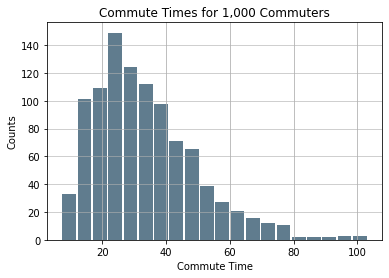

In [ ]:
# panda & Matplot histogram example; 1000 obs from a Gamma dist in 20 bins
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5) 

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Commute Time')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

Text(0, 0.5, 'Counts')

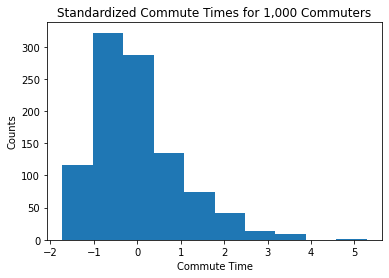

In [13]:
#Cental limit theorm demo
# panda & Matplot histogram example; 1000 obs from a Gamma dist in 20 bins
size, scale = 1000, 10
x2 = pd.Series(np.random.gamma(scale, size=size) ** 1.5) 
mu2=np.mean(x2)
std2=np.std(x2)
z2=(x2-mu2)/std2

z2.plot.hist() # histogram default setting
plt.title('Standardized Commute Times for 1,000 Commuters')
plt.xlabel('Commute Time')
plt.ylabel('Counts')
#plt.grid(axis='y', alpha=0.75)

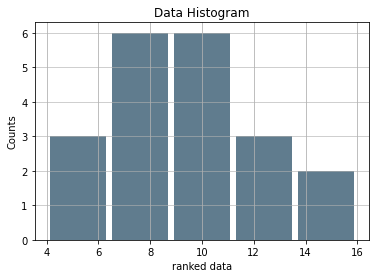

In [ ]:
# switch data set into y; first convert the array in the panda dataframe format
data=pd.Series(y)
data.plot.hist(grid=True, bins=5, rwidth=0.9,
                   color='#607c8e')
plt.title('Data Histogram')
plt.xlabel('ranked data')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [ ]:
# Frequency Table
# Data is from the above cells
# Note that this code assumes that each increment is by 1 and the number of bin cannot be controlled
# 
import math
# y[0]=int(y[0]) this operation convert a float point into integer
# use a for loop to convert to all elements in the y array
for i in range(len(y)): y[i]=int(y[i])

y

array([ 9.,  4.,  7.,  8., 11.,  8., 10., 16.,  7., 12., 13.,  8., 11.,
        6., 12.,  6., 11., 16., 10.,  8.])

In [ ]:
# Frequency Table
# Data is from the above cells
# Note that this code assumes that each increment is by 1 and the number of bin cannot be controlled
ind=pd.Series(y) # the index is like the bin column and the columns are the requency counts
# pndata crosstab function is used to count the frequency
# this is similary to the stem and leaf plot
df1=pd.crosstab(index=ind, columns='freq')
df1.freq

row_0
4.0     1
6.0     2
7.0     2
8.0     4
9.0     1
10.0    2
11.0    3
12.0    2
13.0    1
16.0    2
Name: freq, dtype: int64

In [ ]:
# Use bar chart to plot the frequency table as histogram
y1=df1["freq"]
y1

row_0
4.0     1
6.0     2
7.0     2
8.0     4
9.0     1
10.0    2
11.0    3
12.0    2
13.0    1
16.0    2
Name: freq, dtype: int64

In [ ]:
x1=df1.index
x1

Float64Index([4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 16.0], dtype='float64', name='row_0')

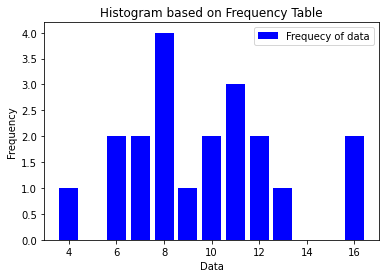

In [ ]:
plt.bar(x1,y1, label="Frequecy of data", color='b')
plt.xlabel("Data")
plt.ylabel("Frequency")
plt.title("Histogram based on Frequency Table")
plt.legend()
plt.show()